# supermarket_sales_analysis

In [99]:
## magic command for autocomplete 
%config Completer.use_jedi = False

In [100]:
## importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [101]:
## fetching out of data
df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [102]:
## dataset shape
df.shape

(1000, 17)

In [103]:
## basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [104]:
## statistical information about dataset
round(df.describe())

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,56.0,6.0,15.0,323.0,308.0,5.0,15.0,7.0
std,26.0,3.0,12.0,246.0,234.0,0.0,12.0,2.0
min,10.0,1.0,1.0,11.0,10.0,5.0,1.0,4.0
25%,33.0,3.0,6.0,124.0,118.0,5.0,6.0,6.0
50%,55.0,5.0,12.0,254.0,242.0,5.0,12.0,7.0
75%,78.0,8.0,22.0,471.0,449.0,5.0,22.0,8.0
max,100.0,10.0,50.0,1043.0,993.0,5.0,50.0,10.0


In [105]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [106]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [107]:
df[['Product line', 'Quantity']].groupby(['Product line']).count().sort_values(by='Quantity', ascending=False).style.background_gradient(cmap = 'Reds')

,Quantity
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [108]:
df[['Product line', 'Quantity']].groupby(['Product line']).mean().sort_values(by='Quantity', ascending=False).style.background_gradient(cmap = 'Reds')

,Quantity
Product line,
Electronic accessories,5.711765
Home and lifestyle,5.693750
Health and beauty,5.618421
Sports and travel,5.542169
Food and beverages,5.471264
Fashion accessories,5.067416


In [109]:
fig = px.histogram(df, x='Product line', y='Quantity', title='Best product sale', text_auto=True, color='Product line')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.update_yaxes(showgrid=False)
fig.show()

In [110]:
fig = px.pie(df, values='Quantity', names='Gender', hover_data=['Quantity', 'Gender'], title='Male vs Female : Who buys more?')
fig.update_layout(paper_bgcolor='white')
fig.show()

<Axes: title={'center': 'Interests of Men'}, xlabel='Product line,Gender'>

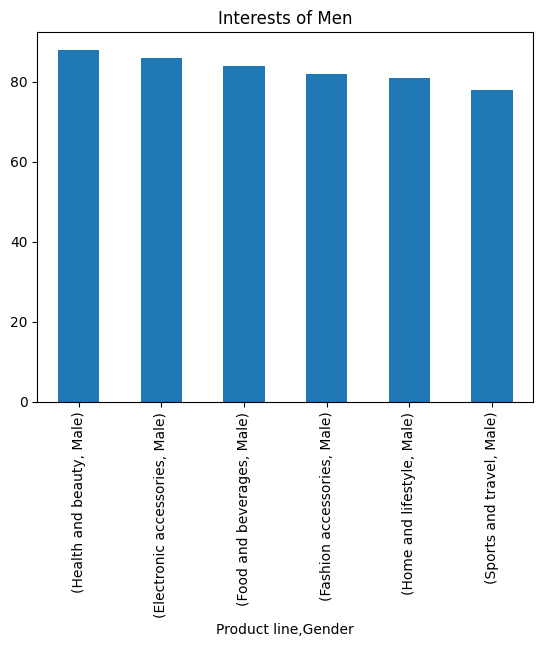

In [111]:
df[['Product line', 'Gender']][(df['Gender'] == 'Male')].value_counts().plot(kind='bar', title='Interests of Men')

<Axes: title={'center': 'Interests of Women'}, xlabel='Product line,Gender'>

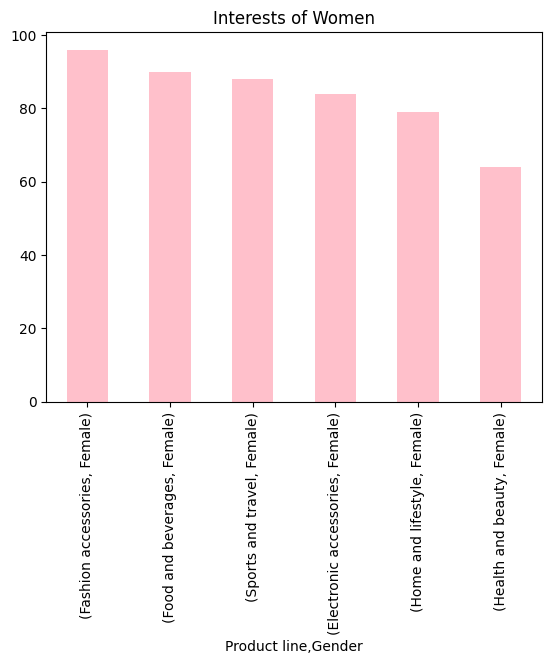

In [112]:
df[['Product line', 'Gender']][(df['Gender'] == 'Female')].value_counts().plot(kind='bar', color='pink', title='Interests of Women')

In [113]:
fig = px.violin(df, x='Product line', y='gross income', color='Product line', title='<b> The lowest selling product <b>', box=True)
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [114]:
fig = px.histogram(df, x='Product line', y='Unit price', text_auto=True, color='Product line', opacity=0.8, title='<b> Distributing product line according to unit price <b>')
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [115]:
fig = px.strip(df, x='Branch', y='gross income', color='Branch', title='<b> The most profitable branch <b>')
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [116]:
df.pivot_table(index='Branch', columns='Gender', values='cogs', aggfunc='count').style.background_gradient(cmap='Reds')

Gender,Female,Male
Branch,,
A,161,179
B,162,170
C,178,150


<Axes: title={'center': 'Distribution of men and women according to cogs'}, xlabel='Branch'>

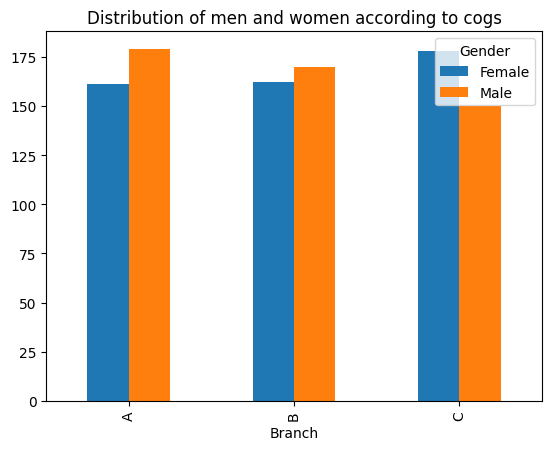

In [117]:
    df.pivot_table(index='Branch', columns='Gender', values='cogs', aggfunc='count').plot(kind='bar', title='Distribution of men and women according to cogs')

<Axes: title={'center': 'Distribution of men and women according to cogs'}, ylabel='Density'>

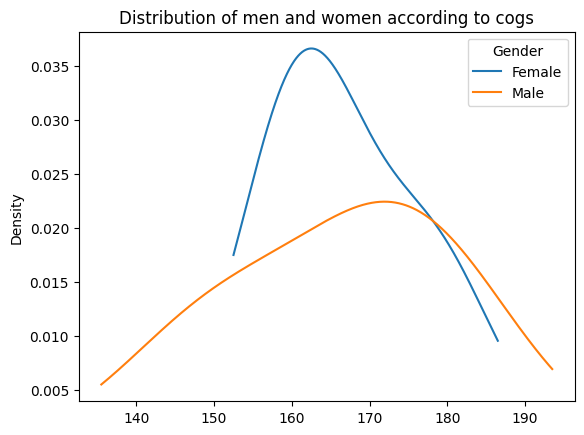

In [118]:
df.pivot_table(index='Branch', columns='Gender', values='cogs', aggfunc='count').plot(kind='kde', title='Distribution of men and women according to cogs')

In [119]:
df.pivot_table(index='Product line', columns='Branch', values='cogs', aggfunc='max').style.background_gradient(cmap='Reds')

Branch,A,B,C
Product line,,,
Electronic accessories,886.700000,897.570000,823.400000
Fashion accessories,989.800000,832.500000,993.000000
Food and beverages,887.940000,846.300000,985.200000
Health and beauty,716.800000,878.700000,905.000000
Home and lifestyle,906.500000,973.800000,975.000000
Sports and travel,882.810000,899.640000,954.400000


<Axes: title={'center': 'Interest of VIP'}, xlabel='Product line'>

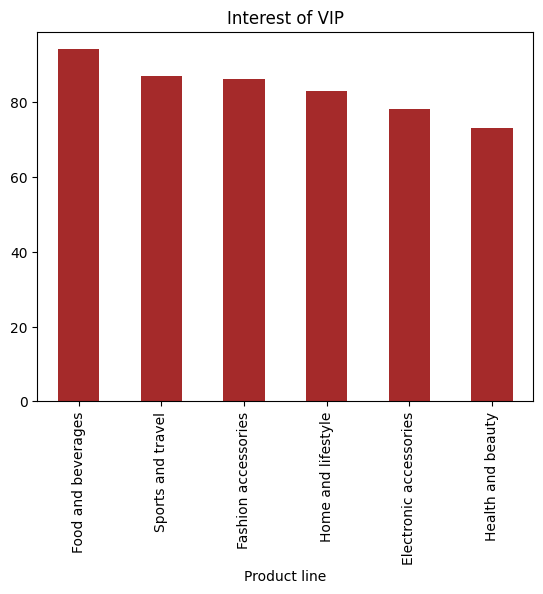

In [120]:
df['Product line'][(df['Customer type'] == 'Member')].value_counts().plot(kind='bar', color='brown', title='Interest of VIP')

In [121]:
fig = px.histogram(df, x='Payment', color='Payment', title='<b> The way of payment <b>', text_auto=True)
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [122]:
df['Date'] = pd.to_datetime(df['Date'])

In [123]:
df.insert(10,'month',df.Date.dt.month)
df.insert(11,'day',df.Date.dt.day)

In [124]:
fig = px.histogram(df, x='month', y='Total', color='month', animation_frame='day', title='<b> Prices change during the months of 2019 <b>', text_auto=True)
fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
fig.show()

In [125]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
month                      0
day                        0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<Axes: >

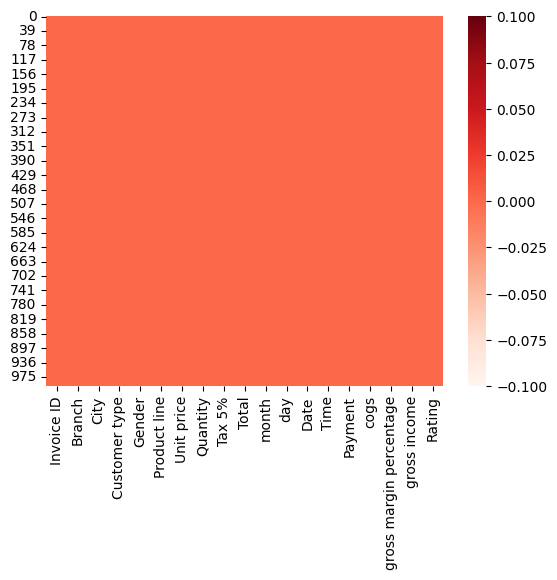

In [126]:
sns.heatmap(df.isna(), cmap='Reds')

In [127]:
df=df.drop(['Invoice ID','Time','Date'],axis=1)

In [128]:
LE=LabelEncoder()

categories=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for label in categories:
    df[label]=LE.fit_transform(df[label])

Text(0.5, 1.0, 'Data correlations')

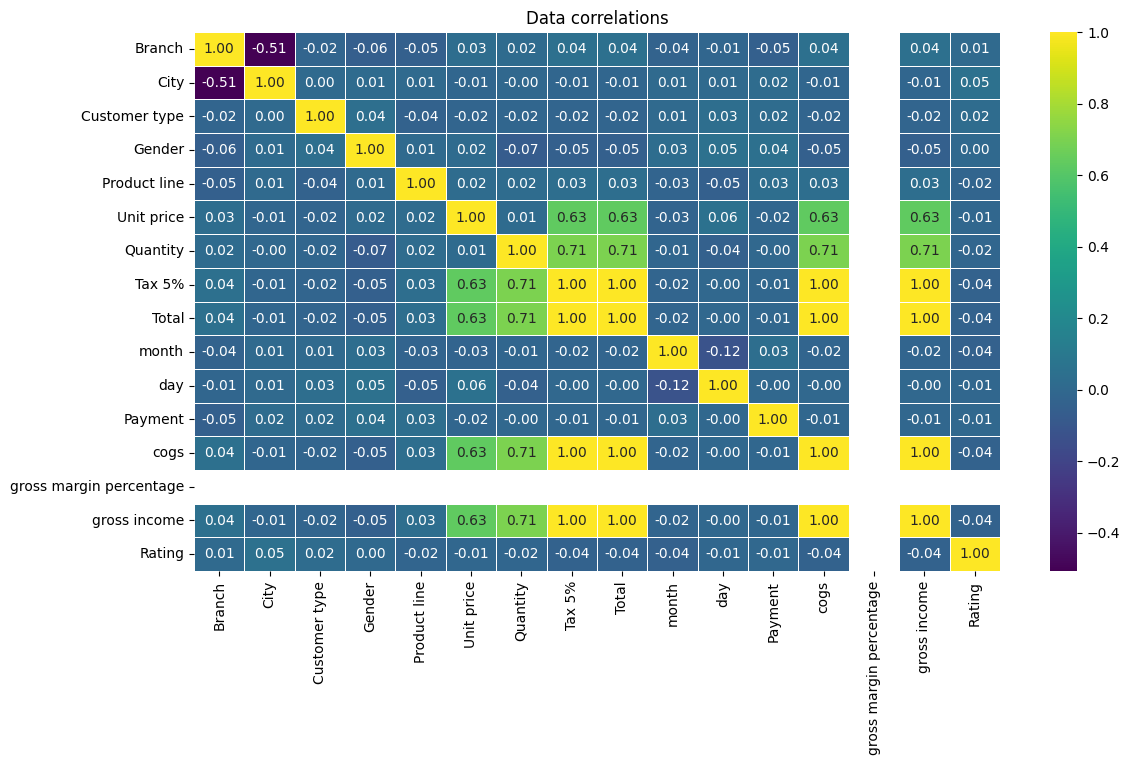

In [129]:
correlation = df.corr()
plt.figure(figsize=(13, 7))
sns.heatmap(correlation, annot=True, annot_kws={'size':10}, fmt='.2f', linewidths=0.5, cmap='viridis')
plt.title('Data correlations')

In [130]:
x = df.drop('Total', axis=1)
y = df['Total']

In [131]:
x.shape, y.shape

((1000, 15), (1000,))

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [134]:
print('lr training score :', round(lr.score(X_train, y_train), 4)* 100)
print('lr training score :', round(lr.score(X_test, y_test), 4)* 100)

lr training score : 100.0
lr training score : 100.0


In [135]:
lr_y_pred=lr.predict(X_test)

In [136]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)

In [137]:
print("xgb training score :",round(xgb.score(X_train,y_train),4)*100)
print("xgb training score :",round(xgb.score(X_test,y_test),4)*100)

xgb training score : 100.0
xgb training score : 99.98


In [138]:
xgb_y_pred = xgb.predict(X_test)

In [139]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=False).fit(X_train, y_train)

In [140]:
print("cbr training score :",round(cbr.score(X_train,y_train),4)*100)
print("cbr training score :",round(cbr.score(X_test,y_test),4)*100)

cbr training score : 100.0
cbr training score : 99.92


In [141]:
cbr_y_pred = cbr.predict(X_test)

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(verbose=False).fit(X_train, y_train)

In [143]:
print("gbr training score :",round(gbr.score(X_train,y_train),4)*100)
print("gbr training score :",round(gbr.score(X_test,y_test),4)*100)

gbr training score : 100.0
gbr training score : 99.99


In [144]:
gbr_y_pred = gbr.predict(X_test)

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [146]:
models_predictions = {'lr':lr_y_pred, 'xgb':xgb_y_pred, 'cbr':cbr_y_pred, 'gbr':gbr_y_pred}
metrics={'mean_absolute_error':mean_absolute_error,'mean_squared_error':mean_squared_error,'median_absolute_error':median_absolute_error}

for model,y_pred in models_predictions.items():
    print(model,'Model :-','\n')
    for m,metric in metrics.items():
        MetricValue = round(metric(y_test, y_pred),2)
        print( m ,' Value is : ',MetricValue,'\n\n')

lr Model :- 

mean_absolute_error  Value is :  0.0 


mean_squared_error  Value is :  0.0 


median_absolute_error  Value is :  0.0 


xgb Model :- 

mean_absolute_error  Value is :  2.66 


mean_squared_error  Value is :  14.93 


median_absolute_error  Value is :  1.64 


cbr Model :- 

mean_absolute_error  Value is :  4.04 


mean_squared_error  Value is :  55.79 


median_absolute_error  Value is :  2.42 


gbr Model :- 

mean_absolute_error  Value is :  1.51 


mean_squared_error  Value is :  4.39 


median_absolute_error  Value is :  1.15 




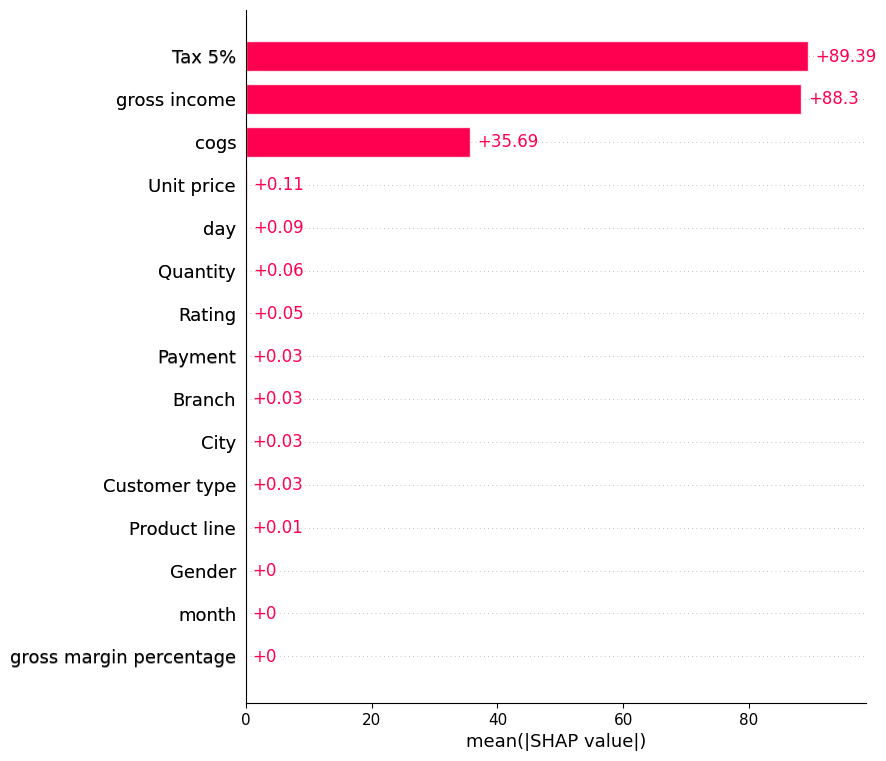

In [147]:
import shap

explainer = shap.Explainer(gbr)
shape_values = explainer(X_test)
shap.plots.bar(shape_values, max_display=15)